<a href="https://colab.research.google.com/github/MakrandDhanokar/CDAC-DAI/blob/main/CDAC_Day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
### Global variables

RANDOM_STATE = 24
np.random.RandomState(seed=RANDOM_STATE)

N_SAMPLE = 1000
NOISE = 0.2
# NOISE = 0.1
ALPHA = 0.1
tEST_SIZE = 0.2
EPOCHS = 2000

# input and output directories
inpDIr = '../../input'
outDir = '../../output'

params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'medium',
          'axes.titlesize':'large',
          'xtick.labelsize':'medium',
          'ytick.labelsize':'medium',
          #'text.usetex':True,
          # 'text.latex.unicode':True
          }

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid')

In [ ]:
# sklearn make_moons
X, y = datasets.make_moons(n_samples=N_SAMPLE,
                           noise=NOISE,
                           shuffle= True,
                           random_state=RANDOM_STATE)

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

### EDA
1. plot the data
2. Print min, max, averages of the datasets

In [ ]:
import pandas as pd
data_df = pd.DataFrame(X, columns = ['A', 'B'])
data_df['target'] = y
data_df.head()

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


<Axes: xlabel='A', ylabel='B'>

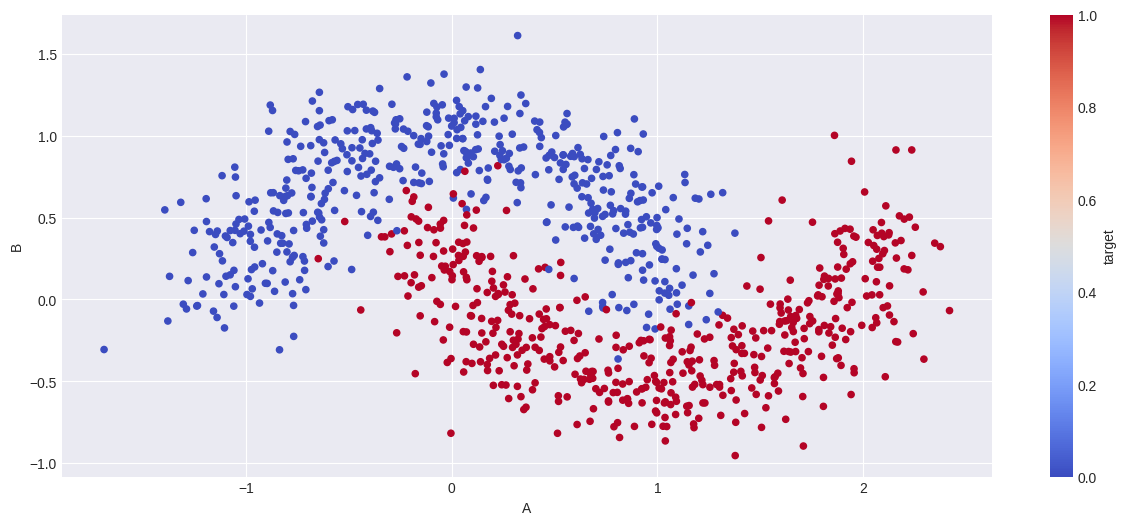

In [ ]:
data_df.plot.scatter(x='A', y='B', c='target', cmap=CMAP)

In [ ]:
def predict(row, wghts):
  z = wghts[0]

  for i in range(len(row)-1):
    z += wghts[i+1] * row[i]
  return 1 if z >= 0 else 0

In [ ]:
weights = np.array([0.1, 2.0, 1.0])
predict(data_df.loc[0].values, weights)

1

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tEST_SIZE, stratify=y, random_state=RANDOM_STATE)

In [ ]:
data_train, data_test = data_df.to_numpy()[:900], data_df.to_numpy()[900:]
display(data_train.shape, data_test.shape)
type(data_train)

(900, 3)

(100, 3)

numpy.ndarray

In [ ]:
data_df

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0
...,...,...,...
995,-1.005476,0.490728,0
996,-0.484457,0.846436,0
997,0.284856,0.793560,0
998,1.712514,-0.177786,1


In [ ]:
# rng = np.random.default_rng(seed=RANDOM_STATE)
# weights = rng.random(data_train.shape[1])
# weights

In [ ]:
rng = np.random.default_rng(seed = RANDOM_STATE)
def train_weights(train, alpha, n_epoch):
  errors = []
  weights = rng.random(train.shape[1]) # randomly generted weights
  m = train.shape[0] # number of samples

  for epoch in range(n_epoch):
    sum_error = 0.0
    for row in train:
      prediction = predict(row, weights)
      dz = prediction - row[-1]
      sum_error += (prediction - row[-1])**2
      weights[0] += alpha * dz /m
      for i in range(len(row) - 1):
        weights[i+1] += -alpha * dz * row[i] / m
    errors.append(sum_error)
  return errors, weights

In [ ]:
errors, weights = train_weights(data_train, ALPHA, EPOCHS)

In [ ]:
weights

array([10.14537995,  0.34595742, -5.51016268])

Text(0.5, 1.0, 'Error vs Epochs')

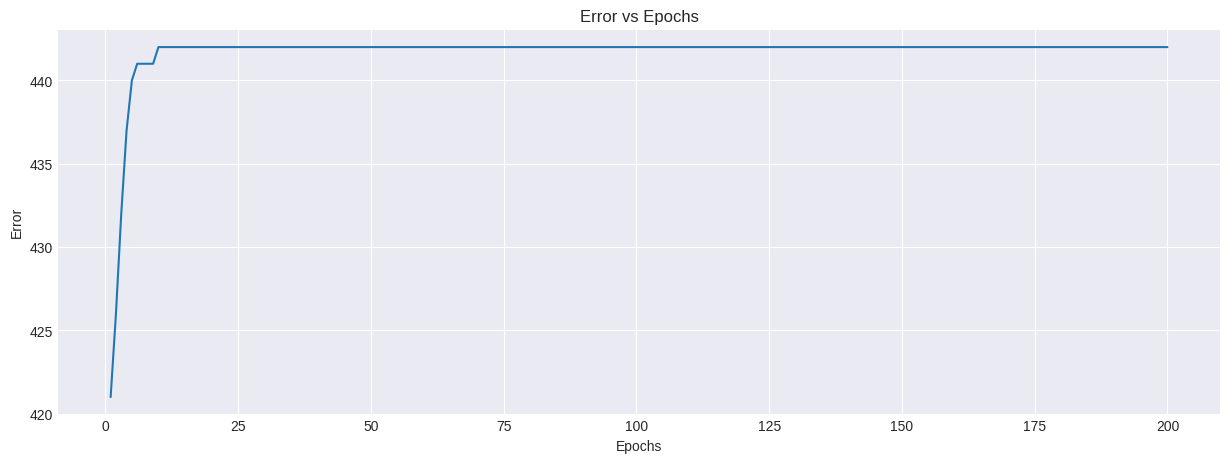

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(np.arange(1, EPOCHS + 1), errors)
ax.set_xlabel('Epochs')
ax.set_ylabel('Error')
ax.set_title('Error vs Epochs')

In [ ]:
def fn_plot_decision_boundary(wts, X):
  fig,ax = plt.subplots(figsize=(8, 5))
  dm = 0.01
  x_min, x_max = X[:, 0].min() , X[:, 0].max()
  y_min, y_max = X[:, 1].min() , X[:, 1].max()
  xx, yy = np.meshgrid(np.arange(x_min, x_max, dm), np.arange(y_min, y_max, dm))
  xx = np.c_[xx.ravel(), yy.ravel()]
  xx = np.hstack (xx, np.ones((xx.shape[0], 1)))

  y_pred = []

  for row in xx:
    y_p = predict(row, wts)
    y_pred.append(y_p)
  z = np.array(y_pred).reshape.shape(xx.shape)

  ax.contourf(xx,yy, z, alpha-0.8, cmap=plt.cm.Paired)
  plt.scatter(X[:,0],X[:,1], c = X[:,2], edgecolors='k', cmap=CMAP)
  plt.show()

In [ ]:
# fn_plot_decision_boundary(weights, data_train)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def fn_plot_decision_boundary(wts, X):
    fig, ax = plt.subplots(figsize=(8, 5))
    dm = 0.01

    # Define the limits for the plot
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Create a mesh grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, dm), np.arange(y_min, y_max, dm))
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    grid_points = np.hstack([grid_points, np.ones((grid_points.shape[0], 1))])

    # Predict for each point on the grid
    y_pred = [predict(row, wts) for row in grid_points]
    z = np.array(y_pred).reshape(xx.shape)

    # Plot the decision boundary
    ax.contourf(xx, yy, z, alpha=0.8, cmap=plt.cm.Paired)

    # Scatter plot of the training data
    ax.scatter(X[:, 0], X[:, 1], c=X[:, 2], edgecolors='k', cmap=plt.cm.Paired)
    plt.show()

# Example function call (ensure `weights` and `data_train` are defined properly)
# fn_plot_decision_boundary(weights, data_train)


NEW NOTEBOOK STARTS FROM HERE

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
####GLOBAL VARIABLE####

RANDOM_STATE = 24
np.random.RandomState(seed= RANDOM_STATE)

N_SAMPLE = 1000
NOISE = 0.2
ALPHA =0.1
TEST_SIZE = 0.2
EPOCHS = 200

#Set the plotting parameters
params = {
    'legend.fontsize': 'medium',
    'figure.figsize': (15, 4),
    'axes.labelsize': 'medium',
    'axes.titlesize':'large',
    'xtick.labelsize':'medium',
    'ytick.labelsize':'medium',
    # 'text.usetex': True,
    # 'text.latex.unicode': True
}

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid')

In [ ]:
X,y = datasets.make_moons(n_samples=N_SAMPLE,
                          noise=NOISE,
                          shuffle=True,
                          random_state=RANDOM_STATE)
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# EDA
# 1.plot the data
# 2. Print min, max, averages of this datasets


In [ ]:
data_df = pd.DataFrame(X, columns=['A', 'B'])
data_df['target'] = y
data_df.head()

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


<Axes: xlabel='A', ylabel='B'>

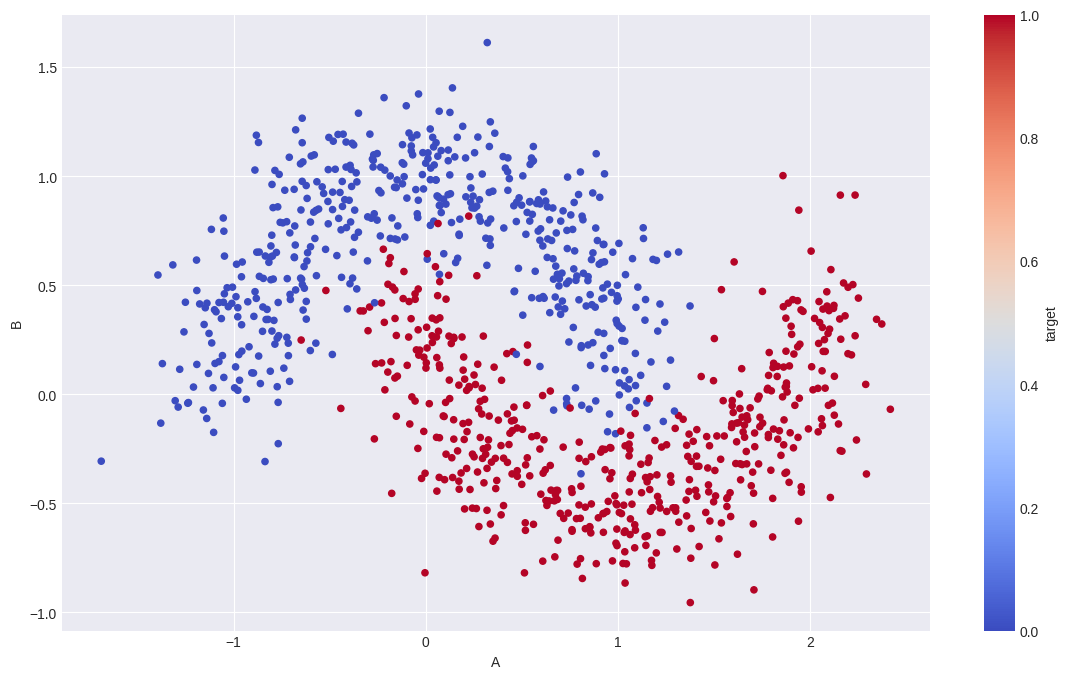

In [ ]:
data_df.plot.scatter(x='A', y='B', c='target', cmap=CMAP,figsize=(14,8))

In [ ]:
data_df.describe()

,A,B,target
count,1000.000000,1000.000000,1000.00000
mean,0.490841,0.239025,0.50000
std,0.898951,0.540082,0.50025
min,-1.688795,-0.955280,0.00000
25%,-0.149565,-0.205090,0.00000
50%,0.500100,0.241163,0.50000
75%,1.095048,0.680394,1.00000
max,2.419113,1.612075,1.00000


In [ ]:
#predict function
def predict(row, weight):
  z = weight[0]
  for i in range(len(row) - 1):
    z += weight[i+1] * row[i]
  return 1.0 if z >= 0.0 else 0.0

In [ ]:
#Testing above function
weights = np.array([0.1, 2.0, 1.0])
predict(data_df.loc[0].values, weights)

1.0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_STATE)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
#Doing train test split manually
data_train, data_test = data_df.to_numpy()[:900], data_df.to_numpy()[900:]
display(data_train.shape)
type(data_train)

(900, 3)

numpy.ndarray

In [ ]:
rng  =np.random.default_rng(seed=RANDOM_STATE)
weights = rng.random(data_train.shape[1])
weights

array([0.33026884, 0.40517732, 0.57473782])

In [ ]:
errors ,weights = train_weights(data_train, ALPHA, EPOCHS)

In [ ]:
weights

array([-4.46771743e-05,  2.37064990e-04, -4.07450311e-04])

In [ ]:
len(errors)

200

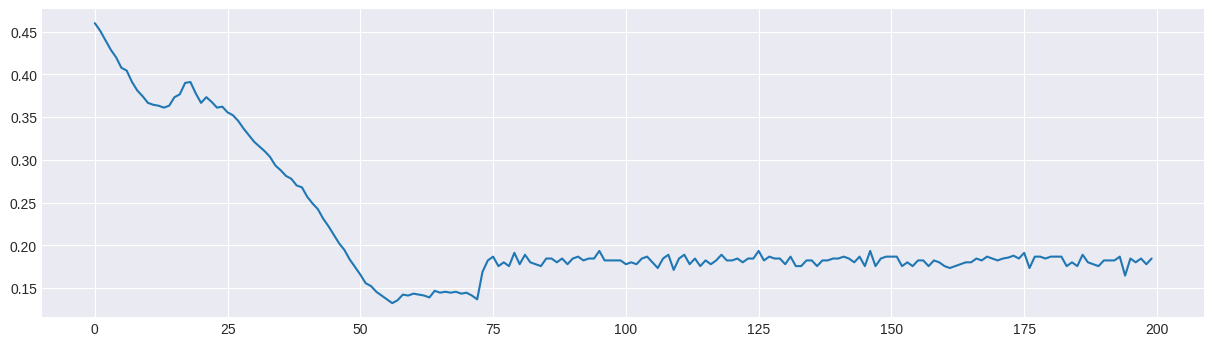

In [ ]:
fig, ax = plt.subplots()
ax.plot(errors)

In [ ]:
def fn_plot_decision_boundary(weights,X):

  fig, ax = plt.subplots(figsize=(8,5))
  dm=0.01
#min and max alog two axis
  x_min, x_max = X[:, 0].min(), X[:, 0].max()
  y_min, y_max = X[:, 1].min(), X[:, 1].max()

#generate a meshgrid
  xx, yy = np.meshgrid(np.arange(x_min, x_max, dm),
                       np.arange(y_min, y_max, dm))

  XX = np.c_[xx.ravel(), yy.ravel()]

  XX = np.hstack([XX,np.ones((XX.shape[0],1))])

  y_pred = []

  for row in XX:
    y_P = predict(row, weights)
    y_pred.append(y_P)
  Z = np.array(y_pred).reshape(xx.shape)


  ax.contourf(xx, yy, Z, cmap=CMAP)
  ax.scatter(X[:, 0], X[:, 1], c=X[:,2],edgecolors = 'k', cmap=CMAP)

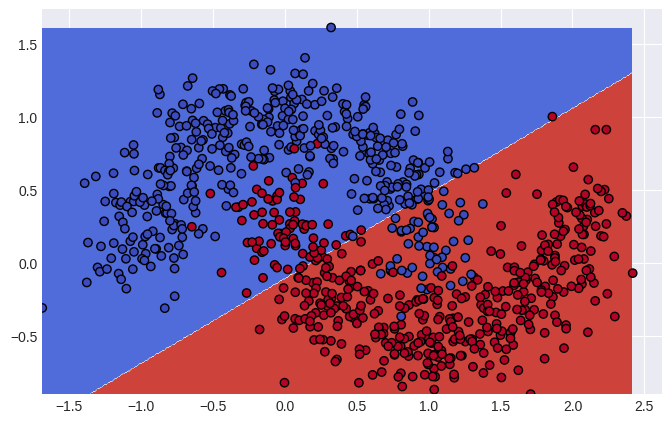

In [ ]:
fn_plot_decision_boundary(weights,data_train)

**1. EDA**

**2.Attach sigmoid**

**3.accuracy's confusion matrix**

In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay


####GLOBAL VARIABLE####

RANDOM_STATE = 24
np.random.RandomState(seed= RANDOM_STATE)

N_SAMPLE = 1000
NOISE = 0.2
ALPHA =0.1
TEST_SIZE = 0.2
EPOCHS = 4000

#Set the plotting parameters
params = {
    'legend.fontsize': 'medium',
    'figure.figsize': (15, 4),
    'axes.labelsize': 'medium',
    'axes.titlesize':'large',
    'xtick.labelsize':'medium',
    'ytick.labelsize':'medium',
    # 'text.usetex': True,
    # 'text.latex.unicode': True
}

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid')


In [173]:
X,y = datasets.make_moons(n_samples=N_SAMPLE,
                          noise=NOISE,
                          shuffle=True,
                          random_state=RANDOM_STATE)
X.shape, y.shape

data_df = pd.DataFrame(X, columns=['A', 'B'])
data_df['target'] = y
data_df.head()

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


<Axes: xlabel='A', ylabel='B'>

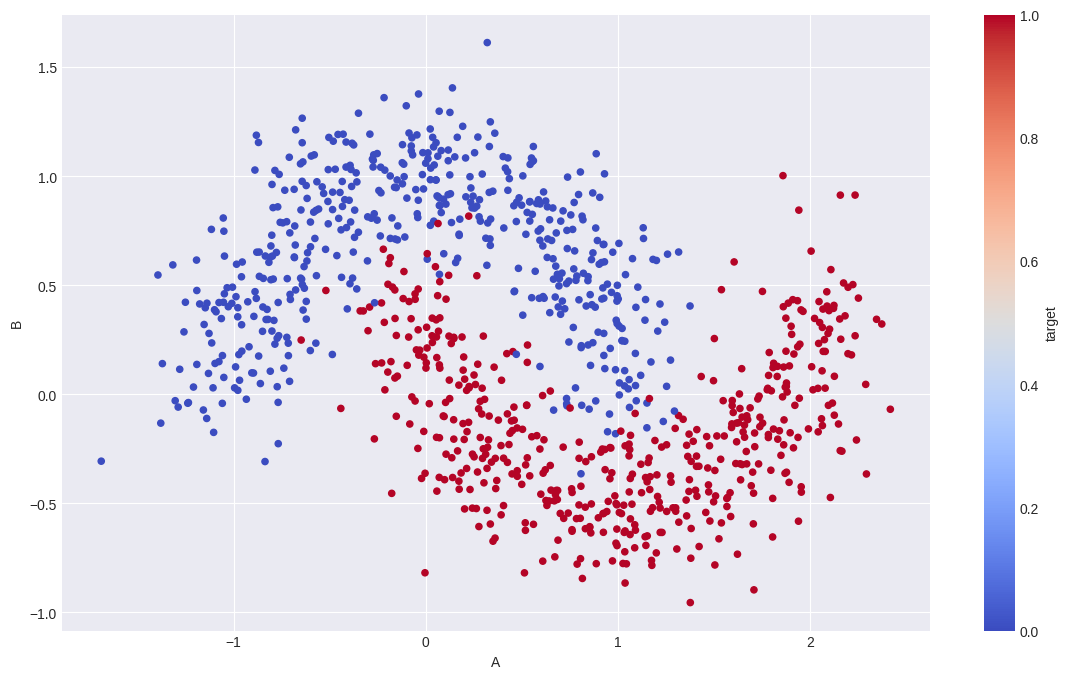

In [174]:
data_df.plot.scatter(x='A', y='B', c='target', cmap=CMAP,figsize=(14,8))

In [175]:
#sigmoid function
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

#predict function
def predict(row, weight):
  z = weight[0]
  for i in range(len(row) - 1):
    z += weight[i+1] * row[i]
  return sigmoid(z)


In [176]:
#rng = Random Number Generator
rng  =np.random.default_rng(seed=RANDOM_STATE)
weights = rng.random(data_train.shape[1])

In [177]:

def train_weights(train,alpha,n_epochs):
  errors =[]
  weights = rng.random(train.shape[1])  #randomly generated weights
  m = train.shape[0]  #no of samples

  for epochs in range(n_epochs):
    sum_error = 0.0
    for row in train:
      prediction = predict(row, weights)
      dz = prediction - row[-1]
      sum_error += -row[-1]*np.log(prediction)
      weights[0] += -alpha * dz / m

      for i in range(len(row) - 1):
        weights[i+1] += -alpha * dz/m * row[i]
    errors.append(sum_error/m)
  return errors, weights

In [178]:
errors ,weights = train_weights(data_train, ALPHA, EPOCHS)

In [179]:
len(errors)

4000

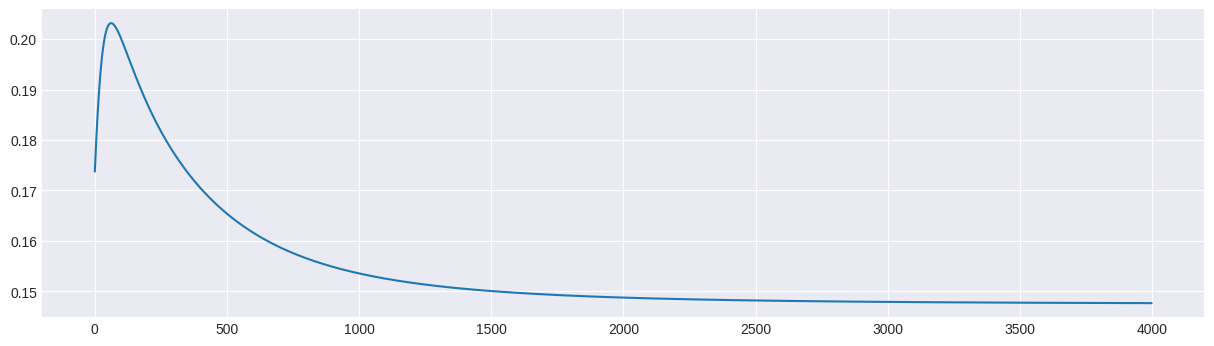

In [180]:
fig, ax = plt.subplots()
ax.plot(errors)
plt.show()

In [181]:
def fn_plot_decision_boundary(weights,X):

  fig, ax = plt.subplots(figsize=(8,5))
  dm=0.01
#min and max alog two axis
  x_min, x_max = X[:, 0].min(), X[:, 0].max()
  y_min, y_max = X[:, 1].min(), X[:, 1].max()

#generate a meshgrid
  xx, yy = np.meshgrid(np.arange(x_min, x_max, dm),
                       np.arange(y_min, y_max, dm))

  XX = np.c_[xx.ravel(), yy.ravel()]

  XX = np.hstack([XX,np.ones((XX.shape[0],1))])

  y_pred = []

  for row in XX:
    a = predict(row, weights)
    y_p = 0
    if a >= 0.5:
        y_p = 1
    y_pred.append(y_p)
  Z = np.array(y_pred).reshape(xx.shape)


  ax.contourf(xx, yy, Z, cmap=CMAP)
  ax.scatter(X[:, 0], X[:, 1], c=X[:,2],edgecolors = 'k', cmap=CMAP)

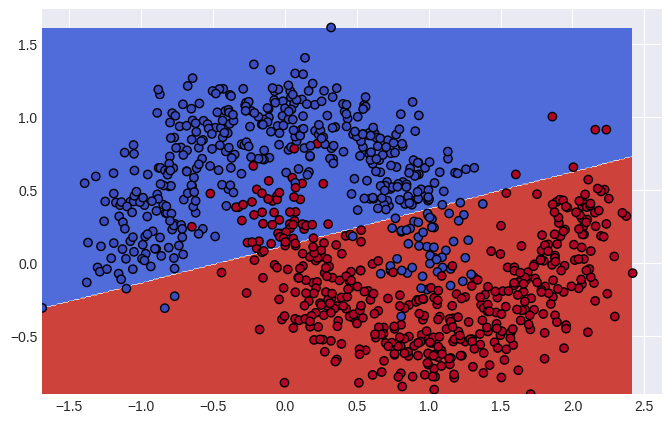

In [182]:
fn_plot_decision_boundary(weights,data_train)

In [183]:
def fn_plot_decision_boundary(weights,X):

  fig, ax = plt.subplots(figsize=(8,5))
  dm=0.05
#min and max alog two axis
  x_min, x_max = X[:, 0].min(), X[:, 0].max()
  y_min, y_max = X[:, 1].min(), X[:, 1].max()

#generate a meshgrid
  xx, yy = np.meshgrid(np.arange(x_min, x_max, dm),
                       np.arange(y_min, y_max, dm))

  XX = np.c_[xx.ravel(), yy.ravel()]

  XX = np.hstack([XX,np.ones((XX.shape[0],1))])

  y_pred = []

  for row in XX:
    a = predict(row, weights)
    y_p = 0
    if a >= 0.5:
        y_p = 1
    y_pred.append(y_p)
  Z = np.array(y_pred).reshape(xx.shape)


  ax.contourf(xx, yy, Z, cmap=CMAP)
  ax.scatter(X[:, 0], X[:, 1], c=X[:,2],edgecolors = 'k', cmap=CMAP)

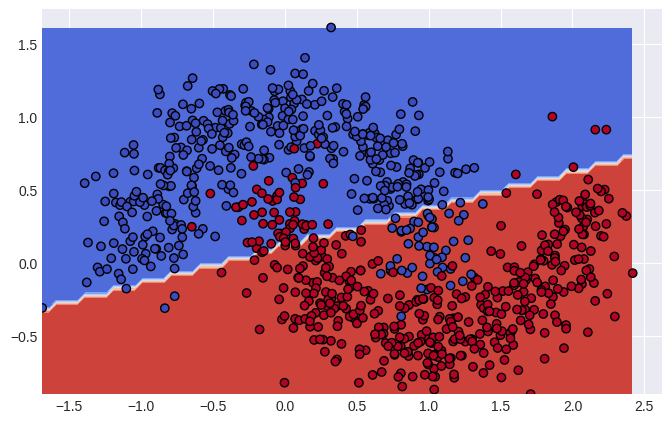

In [184]:
fn_plot_decision_boundary(weights,data_train)

# Accuracies, Confusion Matrix

In [186]:
preds = []

for row in data_train:
  a = predict(row, weights)
  y_pred = 0
  if a >= 0.5:
    y_pred = 1
  preds.append(y_pred)

accuracy_score(data_train[:,-1], preds)

0.8655555555555555

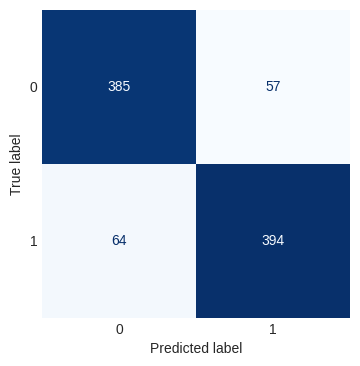

In [190]:
cm = confusion_matrix(data_train[:,-1], preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [0,1])
fig,ax = plt.subplots(figsize=(4,4))
disp.plot(ax = ax, cmap = 'Blues', colorbar = False)
ax.grid(False)

In [191]:
# import links
# https://colab.research.google.com/drive/1OX1eUU1c3ZqiE0Lex0FvRA84TA_b7Y0w?usp=sharing#scrollTo=60sVsGWbsR9J

Activation Function

In [192]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [193]:
def fn_actv(z):
  return np.tanh(z)

def fn_actv_prime(z):
  return 1 - np.tanh(z)**2

In [195]:
fn_actv(np.array([-1,0,1], [-(np.inf), 0, np.inf]))

TypeError: Field elements must be 2- or 3-tuples, got '-inf'

In [196]:
def predict():
  z = 1
  return sigmoid(z)

In [197]:
def fn_calculate_loss():
  pass

In [199]:
features_df = data_df.drop('target', axis=1)
labels = data_df['target']

In [200]:
X_train, X_test, y_train, y_test = train_test_split(features_df,
                                                    labels,
                                                    test_size=TEST_SIZE,
                                                    stratify=labels,
                                                    random_state=RANDOM_STATE)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [203]:
def build_model(nn_hdim, X_t, y_t):
  '''
  2 - 4 - 1
  '''

  m, nn_input_dim = X_t.shape
  nn_output_shape = y_t.shape[1]

  W1 = rng.random(nn_input_dim, nn_hdim, dtype = np.float32) / np.sqrt(nn_input_dim)
  w2 = rng.random(nn_hdim, nn_output_shape, dtype = np.float32) / np.sqrt(nn_hdim)
  b1 = np.zeros(nn_hdim, dtype = np.float32)

  print(W1.shape, w2.shape, b1.shape)

In [202]:
y_train = y_train.to_numpy().reshape(-1,1)
y_train.shape

(800, 1)

In [ ]:
build_model()